In [1]:
#Import dependencies and setup data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import requests
import time
import matplotlib.pyplot as plt
from pylab import rcParams
#for better graph 
import seaborn as sb 

import scipy 
from scipy.stats.stats import pearsonr 


In [2]:
#Visualization setting 
%matplotlib inline
rcParams["figure.figsize"] = 5,4
sb.set_style("whitegrid")

In [3]:
#Import data from data source 
data ="Data_use/Heart_Disease_Mortality.csv"
data_cause = "Data_use/Diabetic_causes.csv"

diabteitc_mortality = pd.read_csv(data)
diabetic_cause =pd.read_csv(data_cause)
# Combine the data into a single dataset
to_model_data = pd.merge(diabteitc_mortality,diabetic_cause, on="LocationAbbr" )
to_model_data.head()
#to_model_data.to_csv("Heart_Mod.csv")
#diabetic_cause.head()
#diabteitc_mortality.head(20)



,LocationAbbr,DataValue,DEATHS,URL,State,AdultObesity rate,High School Obesity Rate,Per Capita Alcohol consupltion,Percentage of Smoker
0,AL,222.5,12832,/nchs/pressroom/states/alabama/alabama.htm,Alabama,33.5,16.1,4.01,21.5
1,AL,222.5,12832,/nchs/pressroom/states/alabama/alabama.htm,Alaska,29.7,14.0,5.88,19.0
2,AR,223.7,8090,/nchs/pressroom/states/arkansas/arkansas.htm,Arkansas,35.9,21.7,3.63,22.4
3,AR,223.7,8090,/nchs/pressroom/states/arkansas/arkansas.htm,Arizona,28.9,16.6,4.63,14.7
4,CA,143.1,61573,/nchs/pressroom/states/california/california.htm,California,24.7,13.9,4.66,11.0


In [4]:
# Pearson corelation 
to_model_data.columns=['LocationAbbr','DataValue','State','URL','Deaths','AdultObeisty rate','High School Obesity Rate','Per Capita Alcohol consumption',
                       'Percentage of Smoker']



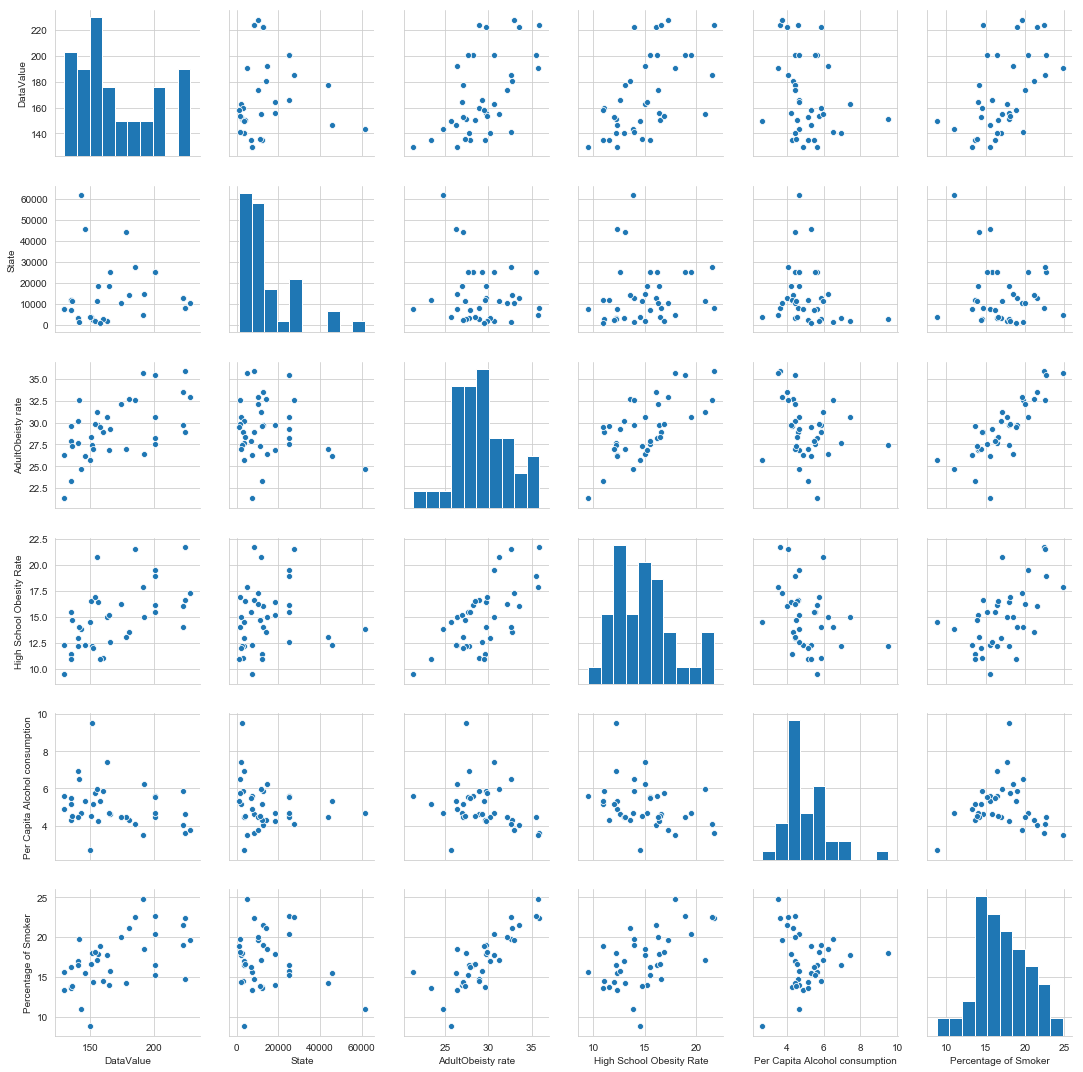

In [5]:
#scatter plot matrix to check for linear and normalization 
sb.pairplot(to_model_data)
plt.savefig("Scatter Plot showing linear relationship")

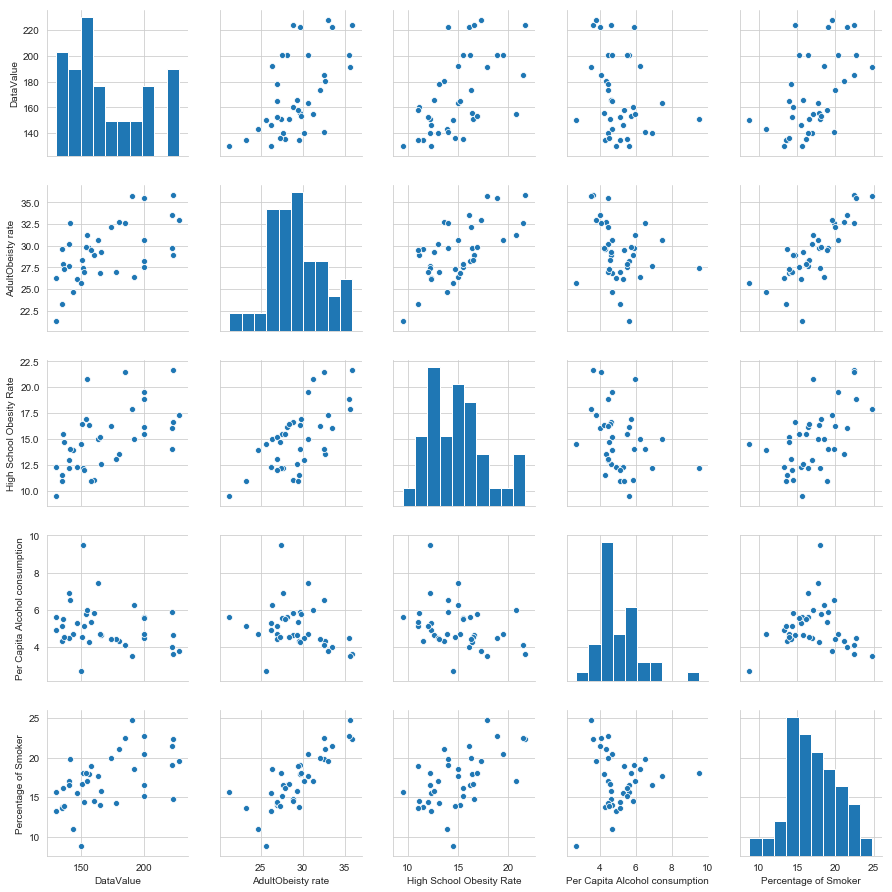

In [7]:
test = to_model_data
test_new = test.drop(['LocationAbbr', 'URL', 'State'],axis=1)
sb.pairplot(test_new)
plt.savefig(" Scatter Plot checking for Normlaity")

In [13]:
#Calculate Pearson correlation Coefficent 
corr = test_new.corr()
corr.to_csv('Correlation Values.csv')
corr

,DataValue,AdultObeisty rate,High School Obesity Rate,Per Capita Alcohol consumption,Percentage of Smoker
DataValue,1.000000,0.566523,0.569675,-0.256754,0.539957
AdultObeisty rate,0.566523,1.000000,0.661010,-0.262613,0.814704
High School Obesity Rate,0.569675,0.661010,1.000000,-0.322937,0.551538
Per Capita Alcohol consumption,-0.256754,-0.262613,-0.322937,1.000000,-0.021730
Percentage of Smoker,0.539957,0.814704,0.551538,-0.021730,1.000000


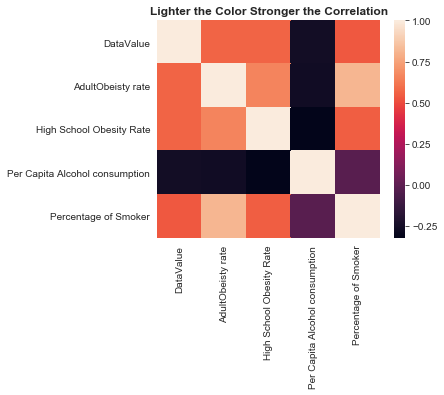

In [12]:
#Heat Map to show the correlation
sb.heatmap(corr,xticklabels =corr.columns.values, yticklabels=corr.columns.values)
plt.title('Lighter the Color Stronger the Correlation', fontweight ='bold')
plt.savefig("Cause Correlation Heatmap")
